### Exercise 1

Consider a one-dimensional oscillator with potential $V(x) = \frac{1}{p} k x^p$ (p even), subject to an external force $F_{ext}(t,x)$.
Assume $m = 1$ (mass of the oscillator in some arbitrary unit) and $k = 39.48$
For this physical system we can write the equation of motion as:

\begin{equation}
F_k(x) + F_{ext}(t,x) = \frac{d^2 x}{d t^2}, 
\end{equation}

where the restoring force $F_k$ on the R.H.S. is written as $F_k(x) = - dV/dx = - k x^{p-1}$.

\begin{enumerate}

\item Set $F_{Ext} = 0$ and integrate the equation of motion between $t=0$ and $t=4$, with initial conditions $[x,v] = [0,10]$. Repeat this for the two cases $p=2$ (linear harmonic oscillator) and $p=6$. Make plots of $t$ vs. $x(t)$ and $t$ vs $v(t)$, showing solutions for both values of $p$.

\item Calculate the total energy (kinetic + potential energy) as a function of time and show that it stays constant within
an accuracy of at least $10^{-7}$. To this purpose, plot the quantity $( {E(t) - E(0) )/E(0)} )$. You get bonus points if you manage to get an accuracy $\sim 10^{-11}$

\item For the $p=6$ non-linear oscillator case, check that the solution satisfies the virial theorem: $\bar{E}_K = 3 \bar{E}_P$, where $\bar{E}_K$ and $\bar{E}_P$ are respectively the kinetic and potential energy averaged over many oscillations. To improve accuracy repeat the ODE integration and take averages in the interval $[t=0,t=40]$ 

\item Now include a time-dependent external force $F_{ext}(t) = F_0 \sin(\omega t)$ and solve again the equation in the time interval $[0,12]$, with the same initial conditions as before and $F_0 = 5$, $\omega = 7$. Plot $t$ vs $x(t)$ for $p=2$, $p=4$ (you should see frequency beatings).

\item Do the same as in the previous point, but now choose $\omega = 2 \pi$. Bonus points if you provide a (short) physical interpretation of the behavior of the solutions in the resulting plot.

\end{enumerate}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def Fext_sin(t,F0,omegaext):
    F = F0*np.sin(omegaext*t)
    return F

def Fext_const(t,c):
    F = c
    return F

def osc(y,t,k,p,Fext):
    # Position
    x = y[0]
    # Velocity
    v = y[1]
    # External force
    F = Fext(t)
    # Restoring force
    Fk = -k*x**(p-1)
    # Derivatives
    f0 = v
    f1 = F + Fk
    return np.array([f0,f1])

In [3]:
kin = 39.48
c = 0

y0 = [0,10]

#def harmonic(y,t): return osc(y,t,k=kin,p=2)
#def nonlin(y,t): return osc(y,t,k=kin,p=6)

dt = 0.01
tmin = 0.
tmax = 4
times = np.arange(tmin,tmax,dt)

pin = 2
harmonic = integrate.odeint(osc,y0,times,rtol=1e-12,atol=1e-12,args=(kin,pin, lambda t: Fext_const(t,c)) )

pin = 6
nonlin = integrate.odeint(osc,y0,times,rtol=0.5e-13,atol=0.5e-13,args=(kin,pin, lambda t: Fext_const(t,c)))
#nonlin = integrate.odeint(osc,y0,times,args=(kin,pin, lambda t: Fext_const(t,c)))

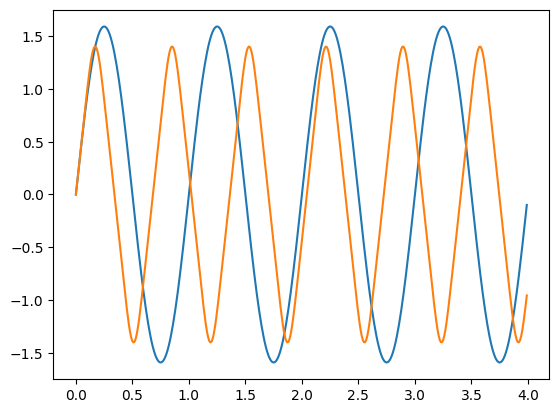

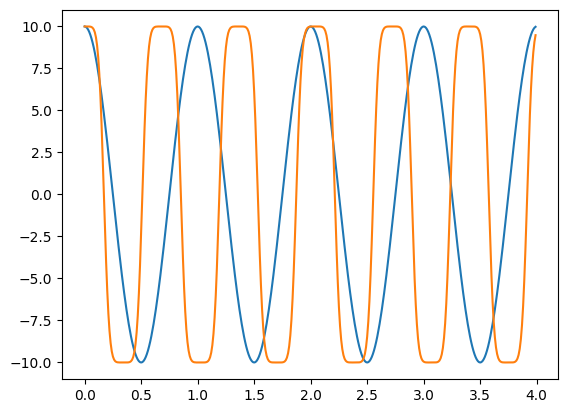

In [4]:
plt.plot(times,harmonic[:,0])
plt.plot(times,nonlin[:,0])
plt.show()

plt.plot(times,harmonic[:,1])
plt.plot(times,nonlin[:,1])
plt.show()

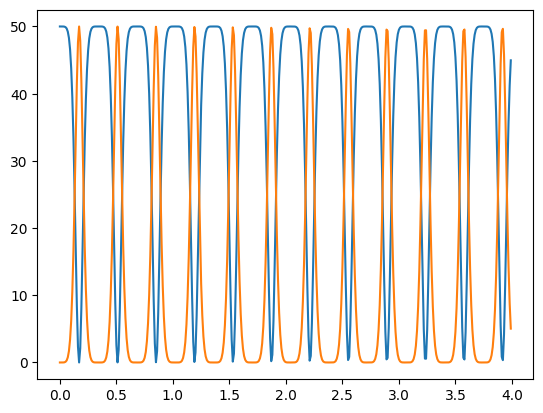

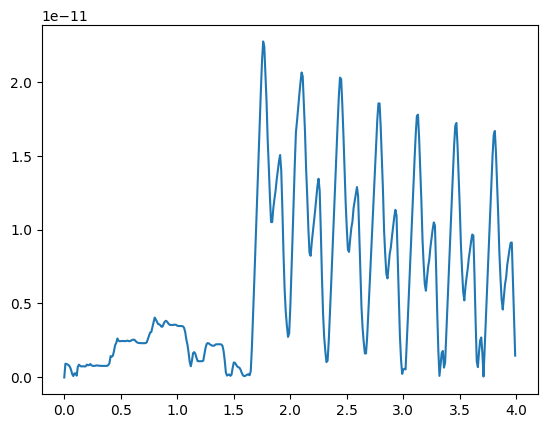

In [5]:
def kinetic(v):
    K = 0.5*v**2
    return K

def potential(x,k,p):
    V = (1./(1.0*p))*k*x**p
    return V
    
EK = kinetic(nonlin[:,1])
EP = potential(nonlin[:,0],k=kin,p=6)
Etot = EK + EP

plt.plot(times,EK)
plt.plot(times,EP)
plt.show()

plt.plot( times, np.abs((Etot - Etot[0])/Etot[0]))
plt.show()

In [6]:
tmax = 40
times = np.arange(tmin,tmax,dt)
pin = 6
nonlin = integrate.odeint(osc,y0,times,rtol=0.5e-13,atol=0.5e-13,args=(kin,pin, lambda t: Fext_const(t,c)))
EK = kinetic(nonlin[:,1])
EP = potential(nonlin[:,0],k=kin,p=6)
print( "Checking virial theorem, r =", np.mean(EK)/(np.mean(3.*EP)) )

Checking virial theorem, r = 1.0018066515592094


In [7]:
def Fext_sin(t,F0,omegaext):
    F = F0*np.sin(omegaext*t)
    return F

kin = 39.48
y0 = [0,10]

dt = 0.005
tmin = 0.
tmax = 32
times = np.arange(tmin,tmax,dt)

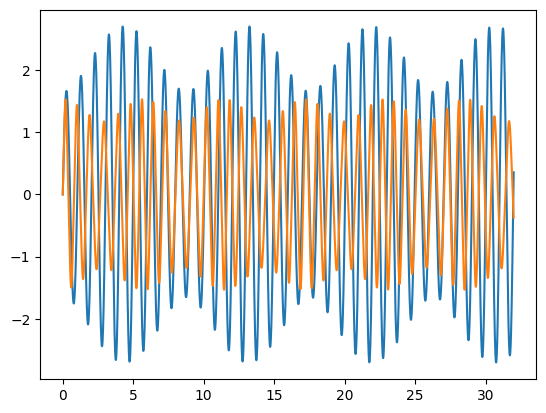

In [8]:
F0 = 5
omega0 = 2*np.pi
omega0 = 7

pin = 2
harmonic = integrate.odeint(osc,y0,times,args=(kin,pin, lambda t: Fext_sin(t,F0,omega0)) )

pin = 4
nonlin = integrate.odeint(osc,y0,times,args=(kin,pin,lambda t: Fext_sin(t,F0,omega0)))

plt.plot(times,harmonic[:,0])
plt.plot(times,nonlin[:,0])
plt.show()

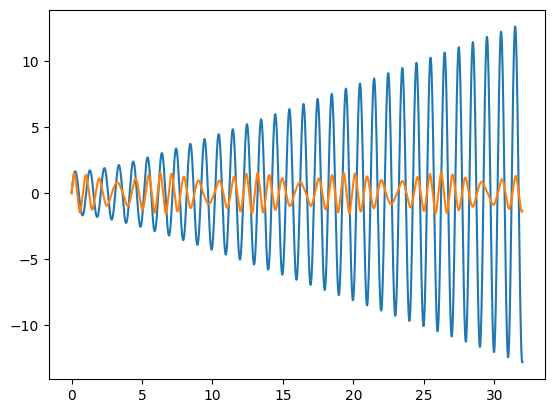

In [9]:
F0 = 5
omega0 = 2*np.pi

pin = 2
harmonic = integrate.odeint(osc,y0,times,args=(kin,pin, lambda t: Fext_sin(t,F0,omega0)) )

pin = 4
nonlin = integrate.odeint(osc,y0,times,args=(kin,pin,lambda t: Fext_sin(t,F0,omega0)))

plt.plot(times,harmonic[:,0])
plt.plot(times,nonlin[:,0])
plt.show()

### Exercise 2

A signal $s(t) = \frac{1}{1-0.9 \sin(t)}$ is sampled in $N=24000$ evenly spaced points, in the interval $t = [0,12]$ s.

\begin{enumerate}

\item The function $s(t)$ can be expanded as $s(t) \simeq 1 + 0.9 \sin(t) + (0.9 \sin(t))^2 + \ldots (0.9 \sin(t))^n + \ldots$. Write a function that computes this expansion for arbitrary values of t and n in input. Using this function, make a plot showing $s(t)$ and its power series approximation for $n = 10, 20, 30$, in the sampled points. 

\item Get the Fourier transform coefficients, $c(k)$, of the sample. Plot the power spectrum $S(k) = |c(k)|^2$, displaying frequency (in Hz) on the x-axis. Calculate the frequency of the largest Fourier component.

\end{enumerate}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, rfft, irfft, rfftfreq, fftfreq
from scipy import integrate

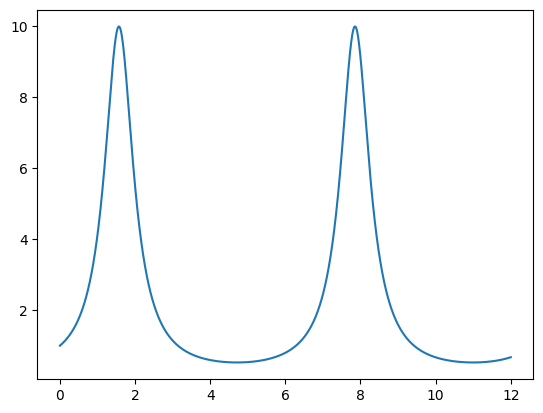

Max (Hz) = 0.16666666666666666


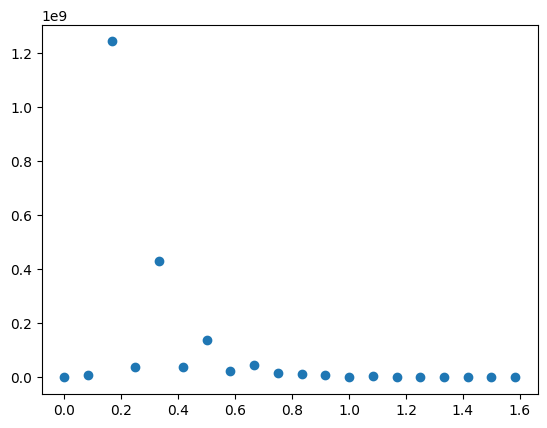

In [6]:
def s(t): return  1./(1. - 0.9*np.sin(t))

N = 24000
tmin = 0.
tmax = 12
times = np.linspace(tmin,tmax,N)

sample_rate = N/tmax

samples = s(times)

plt.plot(times,samples)
plt.show()

ck = rfft(samples - np.mean(samples))
Sk = (np.abs(ck))**2

#print('ck', len(ck))

kmax = np.argmax(Sk)
#print(kmax)
f = (kmax/N)*sample_rate
print('Max (Hz) =', f)

ks = (sample_rate/N)*np.linspace(0,len(Sk),len(Sk))
#ks = fftfreq(N,d=1./sample_rate)

#print(len(ks))
#print(len(Sk))

plt.scatter(ks[0:20],Sk[0:20])
plt.show()

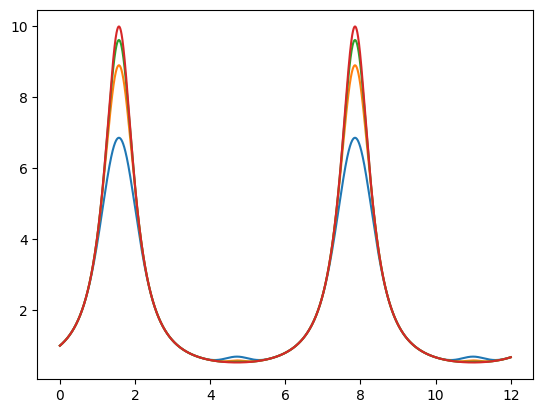

In [7]:
def stexp(t,n):  
    f = 1
    while (n > 0):
        f = f + (0.9*np.sin(t))**n
        n = n - 1
    return f

approx = [ ]
for t in times:
    func1 = stexp(t,n=10)
    func2 = stexp(t,n=20)
    func3 = stexp(t,n=30)
    #print(t, func)
    approx.append([func1,func2,func3]) 
approx = np.vstack(approx)

plt.plot(times,approx[:,0])
plt.plot(times,approx[:,1])
plt.plot(times,approx[:,2])
plt.plot(times,samples)
plt.show()